# Actividad 2.1

### Importamos librerías

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import calmus as cs

### 2. Cargamos nuestro DataFrame de Ginebra

In [144]:
df = cs.cargar_dataset('GINEBRA_LIMPIO.xlsx')
df.head()

,ID ANUNCIIO,ID SCRAPE,FUENTE INFO,NOMBRE ANFITRION,FECHA INICIO ANFITRION,TIEMPO DE RESPUESTA,TASA DE RESPUESTA,TASA DE ACEPTACION,SUPERANFITRION,CANTIDAD ANUNCIOS,CANTIDAD TOTAL ANUNCIOS,LATITUD,LONGITUD,TIPO DE PROPIEDAD,TIPO DE CUARTO,CAPACIDAD,BAÑOS,DORMITORIOS,CAMAS,AMENIDADES,PRECIO,NOCHES MINIMAS,NOCHES MAXIMAS,MINIMO NOCHES MINIMAS,MAXIMO NOCHES MINIMAS,MINIMO NOCHES MAXIMAS,MAXIMO NOCHES MAXIMAS,PROMEDIO NOCHES MINIMAS,PROMEDIO NOCHES MAXIMAS,TIENE DISPONIBILIDAD,DISPONIBILIDAD 30D,DISPONIBILIDAD 60D,DISPONIBILIDAD 90D,DISPONIBILIDAD 365D,CANTIDAD REVIEWS,REVIEWS ULTIMOS 12M,REVIEWS ULTIMOS 30D,PUNTAJE RATING,PUNTAJE PRECISION,PUNTAJE LIMPIEZA,PUNTAJE CHECKIN,PUNTAJE COMUNICACION,PUNTAJE UBICACION,PUNTAJE VALOR,RESERVA INSTANTANEA,ANUNCIOS ANFITRION,ANUNCIOS HOGAR COMPLETO,ANUNCIOS HABITACION PRIVADA,ANUNCIOS HABITACION COMPARTIDA,REVIEWS POR MES
0,42515,20241229042300,city scrape,Noelle,2010-07-30,within a few hours,100.0,88%,f,1,1,46.20198,6.15672,Private room in rental unit,Private room,1,1.5,1.0,1.0,"[""Hair dryer"", ""Bathtub"", ""Stove"", ""Dishes and...",89.0,3,1125,3,3,1125,1125,3.0,1125.0,t,28,58,88,363,79,6,1,4.74,4.73,4.78,4.86,4.84,4.85,4.55,f,1,0,1,0,0.49
1,203997,20241229042300,city scrape,Mike,2011-08-21,within an hour,100.0,100%,t,6,12,46.19964,6.15580,Entire rental unit,Entire home/apt,2,1.0,1.0,0.0,"[""Hair dryer"", ""Lake access"", ""Private entranc...",130.0,5,730,5,5,1125,1125,5.0,1125.0,t,11,41,65,65,89,6,0,4.91,4.98,4.89,4.97,4.99,4.96,4.81,t,2,2,0,0,0.60
2,276025,20241229042300,city scrape,Gaby,2011-11-25,within an hour,100.0,100%,t,2,2,46.28031,6.16833,Entire rental unit,Entire home/apt,3,1.0,1.0,4.0,"[""Hair dryer"", ""Long term stays allowed"", ""Hot...",70.0,7,360,7,7,1125,1125,7.0,1125.0,t,2,2,2,156,122,4,1,4.64,4.70,4.74,4.88,4.89,4.77,4.68,f,1,1,0,0,0.78
3,338682,20241229042300,city scrape,Mike,2011-08-21,within an hour,100.0,100%,t,6,12,46.20708,6.15545,Entire rental unit,Entire home/apt,2,1.5,1.0,1.0,"[""Hair dryer"", ""Dishes and silverware"", ""Kitch...",133.0,5,365,3,5,1125,1125,5.0,1125.0,t,13,13,22,22,121,5,1,4.82,4.86,4.76,4.90,4.89,4.87,4.70,t,2,2,0,0,0.77
4,399388,20241229042300,city scrape,Oscar,2012-03-23,within an hour,100.0,89%,t,2,3,46.18904,6.13908,Private room in rental unit,Private room,2,1.0,1.0,1.0,"[""Hair dryer"", ""Long term stays allowed"", ""Hot...",53.0,2,1125,2,2,1125,1125,2.0,1125.0,t,4,4,27,269,57,7,1,4.85,4.81,4.88,4.95,4.89,4.70,4.70,f,2,0,2,0,0.38


Conviertimos los valores de porcentaje de la columna TASA DE ACEPTACIÓN a decimales para los proximos análisis necesarios.

In [145]:
df['TASA DE ACEPTACION'] = df['TASA DE ACEPTACION'].str.replace('%', '').astype(float) /100

### Vemos valores nulos del DataFrame

In [146]:
cs.identificacion_nulos(df)

Nulos por columna: ID ANUNCIIO                         0
ID SCRAPE                           0
FUENTE INFO                         0
NOMBRE ANFITRION                    0
FECHA INICIO ANFITRION              0
TIEMPO DE RESPUESTA               742
TASA DE RESPUESTA                 742
TASA DE ACEPTACION                448
SUPERANFITRION                     31
CANTIDAD ANUNCIOS                   0
CANTIDAD TOTAL ANUNCIOS             0
LATITUD                             0
LONGITUD                            0
TIPO DE PROPIEDAD                   0
TIPO DE CUARTO                      0
CAPACIDAD                           0
BAÑOS                             690
DORMITORIOS                       207
CAMAS                             694
AMENIDADES                          0
PRECIO                            689
NOCHES MINIMAS                      0
NOCHES MAXIMAS                      0
MINIMO NOCHES MINIMAS               0
MAXIMO NOCHES MINIMAS               0
MINIMO NOCHES MAXIMAS          

### 3. Realizamos las acciones de preprocesamiento necesarias: Nulos y Outliers

Esta función primero sustituirá los valores nulos y luego realiza las acciones de outliers. Y nos dará como output el DataFrame sin valores atípicos.

In [147]:
df = cs.sustituir_atipicos(df)

Nulos por columna: ID ANUNCIIO                    0
TASA DE RESPUESTA              0
TASA DE ACEPTACION             0
CANTIDAD ANUNCIOS              0
CANTIDAD TOTAL ANUNCIOS        0
LATITUD                        0
LONGITUD                       0
CAPACIDAD                      0
BAÑOS                          0
DORMITORIOS                    0
CAMAS                          0
PRECIO                         0
NOCHES MINIMAS                 0
NOCHES MAXIMAS                 0
MINIMO NOCHES MINIMAS          0
MAXIMO NOCHES MINIMAS          0
MINIMO NOCHES MAXIMAS          0
MAXIMO NOCHES MAXIMAS          0
PROMEDIO NOCHES MINIMAS        0
PROMEDIO NOCHES MAXIMAS        0
DISPONIBILIDAD 30D             0
DISPONIBILIDAD 60D             0
DISPONIBILIDAD 90D             0
DISPONIBILIDAD 365D            0
CANTIDAD REVIEWS               0
REVIEWS ULTIMOS 12M            0
PUNTAJE RATING                 0
PUNTAJE PRECISION              0
PUNTAJE LIMPIEZA               0
PUNTAJE CHECKIN         

/Users/andrecalmus/Library/CloudStorage/OneDrive-InstitutoTecnologicoydeEstudiosSuperioresdeMonterrey/Tec/Universidad Tec/7° Semestre/Analítica de Datos y Herraminetas de Inteligencia Artificial/Prof. Alfredo/Parte 2/Actividades/Actividad 2.1/calmus.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  cualitativas = cualitativas_con_nulos.fillna(method='ffill')


 ### 4. Analizamos la correlación que existe en cada tipo de habitación respecto a las variables seleccionadas.

Hacemos un conteo de los valores asignados a cada tipo de cuarto.

In [148]:
df['TIPO DE CUARTO'].value_counts()

TIPO DE CUARTO
Entire home/apt    1960
Private room        791
Shared room           4
Hotel room            2
Name: count, dtype: int64

Generamos una nueva variable para cada tipo de cuarto.

In [149]:
df_entire_home = df[df['TIPO DE CUARTO'] == 'Entire home/apt']
df_private_room = df[df['TIPO DE CUARTO'] == 'Private room']
df_hotel_room = df[df['TIPO DE CUARTO'] == 'Hotel room']
df_shared_room = df[df['TIPO DE CUARTO'] == 'Shared room']

Nos aseguramos de sólo incluir las variables cuantitativas para nuestro análisis.

In [150]:
df_entire_home = df_entire_home.select_dtypes(include=['int64', 'float64'])
df_private_room = df_private_room.select_dtypes(include=['int64', 'float64'])
df_hotel_room = df_hotel_room.select_dtypes(include=['int64', 'float64'])
df_shared_room = df_shared_room.select_dtypes(include=['int64', 'float64'])

## Entire home/apt

Obtenemos las correlaciones entre las variables.

In [151]:
Corr_FactorsEH = df_entire_home[['TASA DE RESPUESTA', 'TASA DE ACEPTACION', 'PRECIO', 'CANTIDAD REVIEWS', 'PUNTAJE UBICACION', 'PUNTAJE LIMPIEZA', 'DISPONIBILIDAD 365D', 'REVIEWS POR MES', 'PUNTAJE COMUNICACION']].corr()
Corr_FactorsEH = abs(Corr_FactorsEH)
Corr_FactorsEH

,TASA DE RESPUESTA,TASA DE ACEPTACION,PRECIO,CANTIDAD REVIEWS,PUNTAJE UBICACION,PUNTAJE LIMPIEZA,DISPONIBILIDAD 365D,REVIEWS POR MES,PUNTAJE COMUNICACION
TASA DE RESPUESTA,1.000000,0.253256,0.105650,0.247879,0.004105,0.049992,0.288969,0.088981,0.045815
TASA DE ACEPTACION,0.253256,1.000000,0.050390,0.230901,0.071826,0.036467,0.021318,0.193217,0.042461
PRECIO,0.105650,0.050390,1.000000,0.009995,0.106205,0.062981,0.106434,0.095362,0.052984
CANTIDAD REVIEWS,0.247879,0.230901,0.009995,1.000000,0.082707,0.005618,0.040986,0.047732,0.012064
PUNTAJE UBICACION,0.004105,0.071826,0.106205,0.082707,1.000000,0.381971,0.058588,0.305316,0.391238
PUNTAJE LIMPIEZA,0.049992,0.036467,0.062981,0.005618,0.381971,1.000000,0.037925,0.235684,0.481529
DISPONIBILIDAD 365D,0.288969,0.021318,0.106434,0.040986,0.058588,0.037925,1.000000,0.053143,0.097760
REVIEWS POR MES,0.088981,0.193217,0.095362,0.047732,0.305316,0.235684,0.053143,1.000000,0.306500
PUNTAJE COMUNICACION,0.045815,0.042461,0.052984,0.012064,0.391238,0.481529,0.097760,0.306500,1.000000


Realizamos mapa de calor ajustando los coeficientes de correlación.

<Axes: >

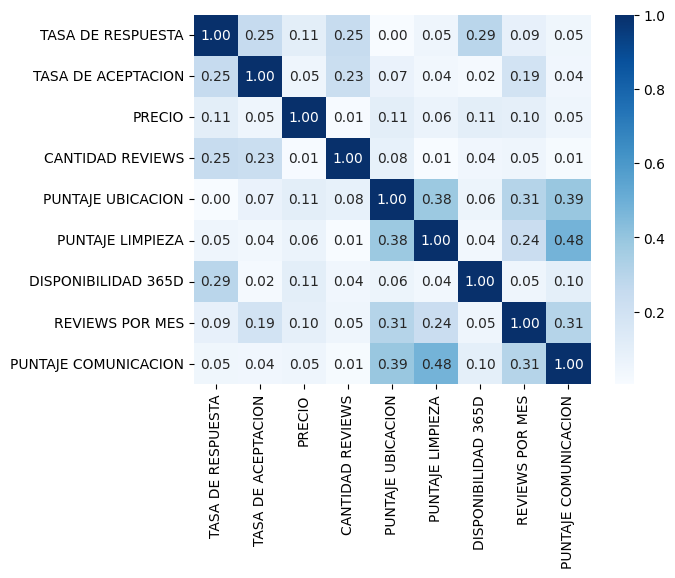

In [152]:
Heat_MapEH = sns.heatmap(Corr_FactorsEH, cmap= 'Blues', annot=True, fmt='.2f')
Heat_MapEH

## Private Room

Obtenemos las correlaciones entre las variables.

In [153]:
Corr_FactorsPR =df_private_room[['TASA DE RESPUESTA', 'TASA DE ACEPTACION', 'PRECIO', 'CANTIDAD REVIEWS', 'PUNTAJE UBICACION', 'PUNTAJE LIMPIEZA', 'DISPONIBILIDAD 365D', 'REVIEWS POR MES', 'PUNTAJE COMUNICACION']].corr()
Corr_FactorsPR = abs(Corr_FactorsPR)
Corr_FactorsPR

,TASA DE RESPUESTA,TASA DE ACEPTACION,PRECIO,CANTIDAD REVIEWS,PUNTAJE UBICACION,PUNTAJE LIMPIEZA,DISPONIBILIDAD 365D,REVIEWS POR MES,PUNTAJE COMUNICACION
TASA DE RESPUESTA,1.000000,0.331697,0.180481,0.089225,0.052083,0.062190,0.097698,0.044236,0.038707
TASA DE ACEPTACION,0.331697,1.000000,0.092326,0.085159,0.030378,0.049722,0.057991,0.071560,0.016217
PRECIO,0.180481,0.092326,1.000000,0.176891,0.074931,0.005006,0.283339,0.076372,0.002476
CANTIDAD REVIEWS,0.089225,0.085159,0.176891,1.000000,0.135673,0.106425,0.009714,0.072660,0.047004
PUNTAJE UBICACION,0.052083,0.030378,0.074931,0.135673,1.000000,0.354373,0.065330,0.279785,0.459280
PUNTAJE LIMPIEZA,0.062190,0.049722,0.005006,0.106425,0.354373,1.000000,0.111724,0.160379,0.482616
DISPONIBILIDAD 365D,0.097698,0.057991,0.283339,0.009714,0.065330,0.111724,1.000000,0.002562,0.109638
REVIEWS POR MES,0.044236,0.071560,0.076372,0.072660,0.279785,0.160379,0.002562,1.000000,0.251805
PUNTAJE COMUNICACION,0.038707,0.016217,0.002476,0.047004,0.459280,0.482616,0.109638,0.251805,1.000000


Realizamos mapa de calor ajustando los coeficientes de correlación.

<Axes: >

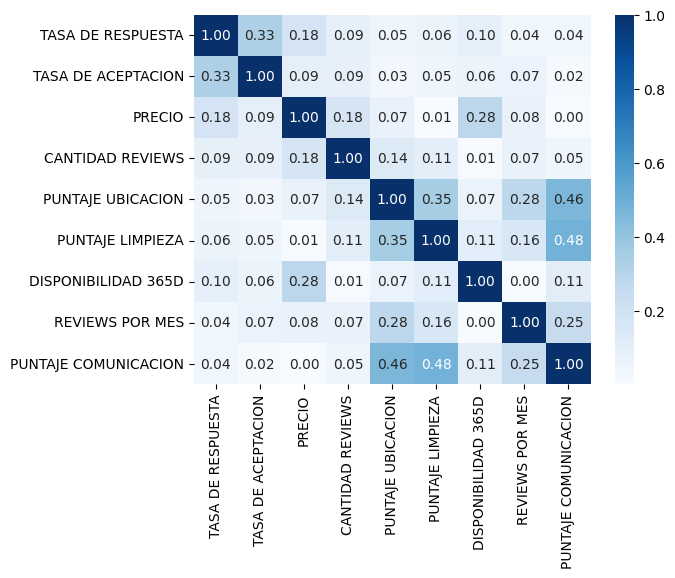

In [154]:
Heat_MapPR= sns.heatmap(Corr_FactorsPR, cmap= 'Blues', annot=True, fmt='.2f')
Heat_MapPR

## Hotel Room

Obtenemos las correlaciones entre las variables.

In [155]:
Corr_FactorsHR=df_hotel_room[['TASA DE RESPUESTA', 'TASA DE ACEPTACION', 'PRECIO', 'CANTIDAD REVIEWS', 'PUNTAJE UBICACION', 'PUNTAJE LIMPIEZA', 'DISPONIBILIDAD 365D', 'REVIEWS POR MES', 'PUNTAJE COMUNICACION']].corr()
Corr_FactorsHR = abs(Corr_FactorsHR)
Corr_FactorsHR

,TASA DE RESPUESTA,TASA DE ACEPTACION,PRECIO,CANTIDAD REVIEWS,PUNTAJE UBICACION,PUNTAJE LIMPIEZA,DISPONIBILIDAD 365D,REVIEWS POR MES,PUNTAJE COMUNICACION
TASA DE RESPUESTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TASA DE ACEPTACION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PRECIO,NaN,NaN,1.0,1.0,1.0,1.0,NaN,1.0,1.0
CANTIDAD REVIEWS,NaN,NaN,1.0,1.0,1.0,1.0,NaN,1.0,1.0
PUNTAJE UBICACION,NaN,NaN,1.0,1.0,1.0,1.0,NaN,1.0,1.0
PUNTAJE LIMPIEZA,NaN,NaN,1.0,1.0,1.0,1.0,NaN,1.0,1.0
DISPONIBILIDAD 365D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
REVIEWS POR MES,NaN,NaN,1.0,1.0,1.0,1.0,NaN,1.0,1.0
PUNTAJE COMUNICACION,NaN,NaN,1.0,1.0,1.0,1.0,NaN,1.0,1.0


Realizamos mapa de calor ajustando los coeficientes de correlación.

<Axes: >

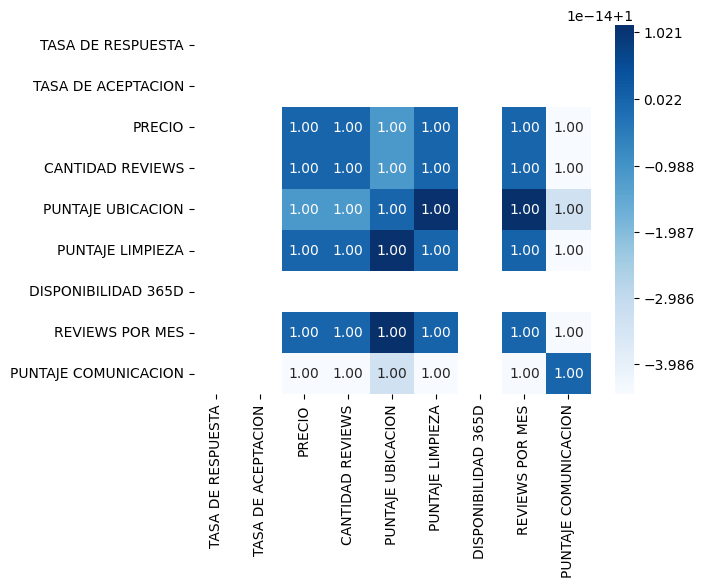

In [156]:
Heat_MapHR= sns.heatmap(Corr_FactorsHR, cmap= 'Blues', annot=True, fmt='.2f')
Heat_MapHR

## Shared Room

Obtenemos las correlaciones entre las variables.

In [157]:
Corr_FactorsSR=df_shared_room[['TASA DE RESPUESTA', 'TASA DE ACEPTACION', 'PRECIO', 'CANTIDAD REVIEWS', 'PUNTAJE UBICACION', 'PUNTAJE LIMPIEZA', 'DISPONIBILIDAD 365D', 'REVIEWS POR MES', 'PUNTAJE COMUNICACION']].corr()
Corr_FactorsSR = abs(Corr_FactorsSR)
Corr_FactorsSR

,TASA DE RESPUESTA,TASA DE ACEPTACION,PRECIO,CANTIDAD REVIEWS,PUNTAJE UBICACION,PUNTAJE LIMPIEZA,DISPONIBILIDAD 365D,REVIEWS POR MES,PUNTAJE COMUNICACION
TASA DE RESPUESTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TASA DE ACEPTACION,NaN,1.000000,0.916371,0.419330,0.474597,0.361326,0.308513,0.944149,0.519754
PRECIO,NaN,0.916371,1.000000,0.527980,0.168524,0.666525,0.097021,0.977133,0.280157
CANTIDAD REVIEWS,NaN,0.419330,0.527980,1.000000,0.440575,0.111091,0.151783,0.641664,0.625649
PUNTAJE UBICACION,NaN,0.474597,0.168524,0.440575,1.000000,0.621808,0.818624,0.362476,0.975933
PUNTAJE LIMPIEZA,NaN,0.361326,0.666525,0.111091,0.621808,1.000000,0.712409,0.504089,0.509078
DISPONIBILIDAD 365D,NaN,0.308513,0.097021,0.151783,0.818624,0.712409,1.000000,0.038459,0.674908
REVIEWS POR MES,NaN,0.944149,0.977133,0.641664,0.362476,0.504089,0.038459,1.000000,0.475745
PUNTAJE COMUNICACION,NaN,0.519754,0.280157,0.625649,0.975933,0.509078,0.674908,0.475745,1.000000


Realizamos mapa de calor ajustando los coeficientes de correlación.

<Axes: >

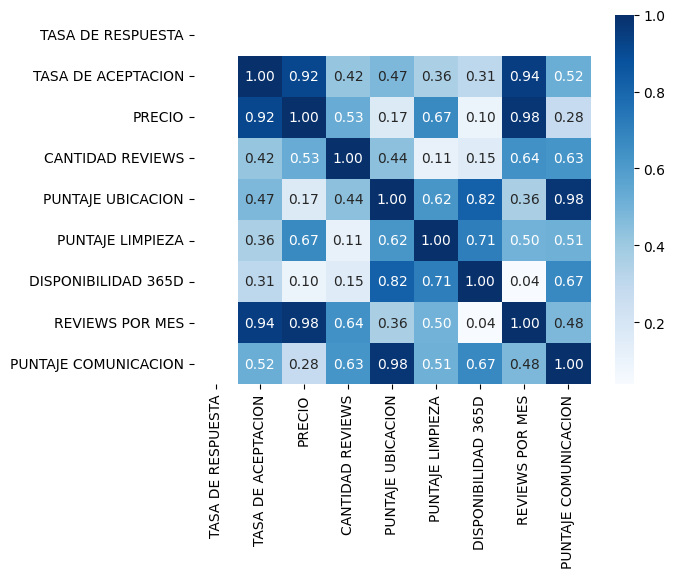

In [158]:
Heat_MapSR= sns.heatmap(Corr_FactorsSR, cmap= 'Blues', annot=True, fmt='.2f')
Heat_MapSR

In [159]:
#genera una tabla con los valores encontrados según los 4 tipo de cuartos
df_corr = pd.concat([Corr_FactorsEH, Corr_FactorsPR, Corr_FactorsHR, Corr_FactorsSR], axis=1)
df_corr

,TASA DE RESPUESTA,TASA DE ACEPTACION,PRECIO,CANTIDAD REVIEWS,PUNTAJE UBICACION,PUNTAJE LIMPIEZA,DISPONIBILIDAD 365D,REVIEWS POR MES,PUNTAJE COMUNICACION,TASA DE RESPUESTA,TASA DE ACEPTACION,PRECIO,CANTIDAD REVIEWS,PUNTAJE UBICACION,PUNTAJE LIMPIEZA,DISPONIBILIDAD 365D,REVIEWS POR MES,PUNTAJE COMUNICACION,TASA DE RESPUESTA,TASA DE ACEPTACION,PRECIO,CANTIDAD REVIEWS,PUNTAJE UBICACION,PUNTAJE LIMPIEZA,DISPONIBILIDAD 365D,REVIEWS POR MES,PUNTAJE COMUNICACION,TASA DE RESPUESTA,TASA DE ACEPTACION,PRECIO,CANTIDAD REVIEWS,PUNTAJE UBICACION,PUNTAJE LIMPIEZA,DISPONIBILIDAD 365D,REVIEWS POR MES,PUNTAJE COMUNICACION
TASA DE RESPUESTA,1.000000,0.253256,0.105650,0.247879,0.004105,0.049992,0.288969,0.088981,0.045815,1.000000,0.331697,0.180481,0.089225,0.052083,0.062190,0.097698,0.044236,0.038707,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TASA DE ACEPTACION,0.253256,1.000000,0.050390,0.230901,0.071826,0.036467,0.021318,0.193217,0.042461,0.331697,1.000000,0.092326,0.085159,0.030378,0.049722,0.057991,0.071560,0.016217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.916371,0.419330,0.474597,0.361326,0.308513,0.944149,0.519754
PRECIO,0.105650,0.050390,1.000000,0.009995,0.106205,0.062981,0.106434,0.095362,0.052984,0.180481,0.092326,1.000000,0.176891,0.074931,0.005006,0.283339,0.076372,0.002476,NaN,NaN,1.0,1.0,1.0,1.0,NaN,1.0,1.0,NaN,0.916371,1.000000,0.527980,0.168524,0.666525,0.097021,0.977133,0.280157
CANTIDAD REVIEWS,0.247879,0.230901,0.009995,1.000000,0.082707,0.005618,0.040986,0.047732,0.012064,0.089225,0.085159,0.176891,1.000000,0.135673,0.106425,0.009714,0.072660,0.047004,NaN,NaN,1.0,1.0,1.0,1.0,NaN,1.0,1.0,NaN,0.419330,0.527980,1.000000,0.440575,0.111091,0.151783,0.641664,0.625649
PUNTAJE UBICACION,0.004105,0.071826,0.106205,0.082707,1.000000,0.381971,0.058588,0.305316,0.391238,0.052083,0.030378,0.074931,0.135673,1.000000,0.354373,0.065330,0.279785,0.459280,NaN,NaN,1.0,1.0,1.0,1.0,NaN,1.0,1.0,NaN,0.474597,0.168524,0.440575,1.000000,0.621808,0.818624,0.362476,0.975933
PUNTAJE LIMPIEZA,0.049992,0.036467,0.062981,0.005618,0.381971,1.000000,0.037925,0.235684,0.481529,0.062190,0.049722,0.005006,0.106425,0.354373,1.000000,0.111724,0.160379,0.482616,NaN,NaN,1.0,1.0,1.0,1.0,NaN,1.0,1.0,NaN,0.361326,0.666525,0.111091,0.621808,1.000000,0.712409,0.504089,0.509078
DISPONIBILIDAD 365D,0.288969,0.021318,0.106434,0.040986,0.058588,0.037925,1.000000,0.053143,0.097760,0.097698,0.057991,0.283339,0.009714,0.065330,0.111724,1.000000,0.002562,0.109638,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.308513,0.097021,0.151783,0.818624,0.712409,1.000000,0.038459,0.674908
REVIEWS POR MES,0.088981,0.193217,0.095362,0.047732,0.305316,0.235684,0.053143,1.000000,0.306500,0.044236,0.071560,0.076372,0.072660,0.279785,0.160379,0.002562,1.000000,0.251805,NaN,NaN,1.0,1.0,1.0,1.0,NaN,1.0,1.0,NaN,0.944149,0.977133,0.641664,0.362476,0.504089,0.038459,1.000000,0.475745
PUNTAJE COMUNICACION,0.045815,0.042461,0.052984,0.012064,0.391238,0.481529,0.097760,0.306500,1.000000,0.038707,0.016217,0.002476,0.047004,0.459280,0.482616,0.109638,0.251805,1.000000,NaN,NaN,1.0,1.0,1.0,1.0,NaN,1.0,1.0,NaN,0.519754,0.280157,0.625649,0.975933,0.509078,0.674908,0.475745,1.000000


## Tabla Comparativa de las Variables Seleccioandas por Tipo de Cuarto.

Se pondrán en la tabla las correlaciones que se pueden ver en el reporte.

In [160]:
datos_correlacion = {
    "Variables Comparadas": [
        "TASA DE ACEPTACIÓN vs TASA DE RESPUESTA",
        "PUNTAJE UBICACIÓN vs PUNTAJE LIMPIEZA",
        "TASA DE ACEPTACIÓN vs PRECIO",
        "DISPONIBILIDAD 365D vs CANTIDAD REVIEWS",
        "TASA DE ACEPTACIÓN vs CANTIDAD REVIEWS",
        "REVIEWS POR MES vs PUNTAJE COMUNICACIÓN"
    ],
    "Entire Home": [0.25, 0.38, 0.05, 0.04, 0.23, 0.31],
    "Private Room": [0.33, 0.35, 0.09, 0.01, 0.09, 0.25],
    "Hotel Room": ['NaN', 1.00, 'NaN', 'NaN', 'NaN', 1.00],
    "Shared Room": ['NaN', 0.62, 0.92, 0.15, 0.42, 0.48],
}
df_correlacion = pd.DataFrame(datos_correlacion)
df_correlacion

,Variables Comparadas,Entire Home,Private Room,Hotel Room,Shared Room
0,TASA DE ACEPTACIÓN vs TASA DE RESPUESTA,0.25,0.33,NaN,NaN
1,PUNTAJE UBICACIÓN vs PUNTAJE LIMPIEZA,0.38,0.35,1.0,0.62
2,TASA DE ACEPTACIÓN vs PRECIO,0.05,0.09,NaN,0.92
3,DISPONIBILIDAD 365D vs CANTIDAD REVIEWS,0.04,0.01,NaN,0.15
4,TASA DE ACEPTACIÓN vs CANTIDAD REVIEWS,0.23,0.09,NaN,0.42
5,REVIEWS POR MES vs PUNTAJE COMUNICACIÓN,0.31,0.25,1.0,0.48


## 5. Creamos el modelo matemático con la mayor correlación para cada tipo de alojamiento elegido.

### Entire Home

In [161]:
#Definimos las variables independientes y dependientes para realizar la regresión lineal
Var_DepEH = df_entire_home['CANTIDAD REVIEWS']
Vars_IndepEH = df_entire_home[['REVIEWS POR MES']]

#Se establece modelEH como la función correspondiente a la regresión lineal
modelEH = LinearRegression()

#Entrenamos el modelo utilizando las variables previamente definidas
modelEH.fit(X=Vars_IndepEH, y=Var_DepEH)

#Revisamos los coeficientes resultantes del modelo ya entrenado
modelEH.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['REVIEWS POR MES'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([1.41047493]),
 'rank_': 1,
 'singular_': array([19.67832405]),
 'intercept_': np.float64(9.099808852938489)}

In [162]:
#Coeficiente de Determinación
coef_DeterEH = modelEH.score(X=Vars_IndepEH, y=Var_DepEH)

#Coeficiente de Correlación
coef_CorrelEH = np.sqrt(coef_DeterEH)

#Visualizamos los resultados
print('Coeficiente de Determinación: ',coef_DeterEH)
print('Coeficiente de Correlación: ',coef_CorrelEH)

Coeficiente de Determinación:  0.002278300502072894
Coeficiente de Correlación:  0.04773154619403078


**Modelo matemático: y = 1.41047493x + 9.099808852938489**

### Private Room

In [163]:
#Definimos las variables independientes y dependientes para realizar la regresión lineal
Var_DepPR = df_private_room['CANTIDAD REVIEWS']
Vars_IndepPR = df_private_room[['REVIEWS POR MES']]

#Se establece modelEH como la función correspondiente a la regresión lineal
modelPR = LinearRegression()

#Entrenamos el modelo utilizando las variables previamente definidas
modelPR.fit(X=Vars_IndepPR, y=Var_DepPR)

#Revisamos los coeficientes resultantes del modelo ya entrenado
modelPR.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['REVIEWS POR MES'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([1.96211895]),
 'rank_': 1,
 'singular_': array([13.31165787]),
 'intercept_': np.float64(9.223581710822662)}

In [164]:
#Coeficiente de Determinación
coef_DeterPR = modelPR.score(X=Vars_IndepPR, y=Var_DepPR)

#Coeficiente de Correlación
coef_CorrelPR = np.sqrt(coef_DeterPR)

#Visualizamos los resultados
print('Coeficiente de Determinación: ',coef_DeterPR)
print('Coeficiente de Correlación: ',coef_CorrelPR) 

Coeficiente de Determinación:  0.005279435756309403
Coeficiente de Correlación:  0.07265972582049428


**Modelo matemático: y = 1.96211895x + 9.223581710822662**

### Hotel Room

In [165]:
#Definimos las variables independientes y dependientes para realizar la regresión lineal
Var_DepHR = df_hotel_room['CANTIDAD REVIEWS']
Vars_IndepHR = df_hotel_room[['REVIEWS POR MES']]

#Se establece modelEH como la función correspondiente a la regresión lineal
modelHR = LinearRegression()

#Entrenamos el modelo utilizando las variables previamente definidas
modelHR.fit(X=Vars_IndepHR, y=Var_DepHR)

#Revisamos los coeficientes resultantes del modelo ya entrenado
modelHR.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['REVIEWS POR MES'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([80.]),
 'rank_': 1,
 'singular_': array([0.03535534]),
 'intercept_': np.float64(2.0)}

In [166]:
#Coeficiente de Determinación
coef_DeterHR = modelHR.score(X=Vars_IndepHR, y=Var_DepHR)

#Coeficiente de Correlación
coef_CorrelHR = np.sqrt(coef_DeterHR)

#Visualizamos los resultados
print('Coeficiente de Determinación: ',coef_DeterHR)
print('Coeficiente de Correlación: ',coef_CorrelHR) 

Coeficiente de Determinación:  1.0
Coeficiente de Correlación:  1.0


**Modelo matemático: y = 80.0x + 2.0**

### Shared Room

In [167]:
#Definimos las variables independientes y dependientes para realizar la regresión lineal
Var_DepSR = df_shared_room['CANTIDAD REVIEWS']
Vars_IndepSR = df_shared_room[['REVIEWS POR MES']]

#Se establece modelEH como la función correspondiente a la regresión lineal
modelSR = LinearRegression()

#Entrenamos el modelo utilizando las variables previamente definidas
modelSR.fit(X=Vars_IndepSR, y=Var_DepSR)

#Revisamos los coeficientes resultantes del modelo ya entrenado
modelSR.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['REVIEWS POR MES'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-40.77417948]),
 'rank_': 1,
 'singular_': array([0.47882669]),
 'intercept_': np.float64(57.79450441609422)}

In [168]:
#Coeficiente de Determinación
coef_DeterSR = modelSR.score(X=Vars_IndepSR, y=Var_DepSR)

#Coeficiente de Correlación
coef_CorrelSR = np.sqrt(coef_DeterSR)

#Visualizamos los resultados
print('Coeficiente de Determinación: ',coef_DeterSR)
print('Coeficiente de Correlación: ',coef_CorrelSR) 

Coeficiente de Determinación:  0.4117320524713872
Coeficiente de Correlación:  0.6416635040824648


**Modelo matemático: y = -40.77417948x + 57.79450441609422**

## 6. Realizamos una tabla de los 10 coeficientes de correlación mas altos, obtenidos para cada tipo de habitación elegido.

In [169]:
#Definimos los tipos de habitación
tipos_cuarto = ["Entire home/apt", "Private room", "Shared room", "Hotel room"]

#DataFrames para almacenar resultados que sacaremos
top_determinacion = pd.DataFrame()
top_correlacion = pd.DataFrame()

for tipo in tipos_cuarto:
    #Filtramos por tipo de habitación
    df_tipo = df[df['TIPO DE CUARTO'] == tipo]
    
    #Seleccionamos variables numéricas
    df_num = df_tipo.select_dtypes(include=[np.number])
    
    #Calculamos matriz de correlación
    corr_matrix = df_num.corr().stack().reset_index()
    corr_matrix.columns = ['Variable X', 'Variable Y', 'Correlacion']
    
    #Filtramos pares únicos y eliminar diagonal para evitar duplicados
    corr_matrix = corr_matrix[corr_matrix['Variable X'] != corr_matrix['Variable Y']]
    corr_matrix['Correlacion_Abs'] = corr_matrix['Correlacion'].abs()
    corr_matrix['Determinacion'] = corr_matrix['Correlacion']**2
    
    #Obtenemos top 10 para cada métrica
    top_det_tipo = corr_matrix.nlargest(10, 'Determinacion')[['Variable X', 'Variable Y', 'Determinacion']]
    top_corr_tipo = corr_matrix.nlargest(10, 'Correlacion_Abs')[['Variable X', 'Variable Y', 'Correlacion']]
    
    #Agregamos identificador de tipo
    top_det_tipo.insert(0, 'Tipo de Cuarto', tipo)
    top_corr_tipo.insert(0, 'Tipo de Cuarto', tipo)
    
    #Concatenamos los resultados
    top_determinacion = pd.concat([top_determinacion, top_det_tipo])
    top_correlacion = pd.concat([top_correlacion, top_corr_tipo])

#Visualizamos los  resultados ordenados
print("Top 10 Coeficientes de Determinación por tipo de cuarto:")
print(top_determinacion.reset_index(drop=True))

print("\nTop 10 Coeficientes de Correlación por tipo de cuarton:")
print(top_correlacion.reset_index(drop=True))

Top 10 Coeficientes de Determinación por tipo de cuarto:
     Tipo de Cuarto               Variable X               Variable Y  \
0   Entire home/apt    MAXIMO NOCHES MAXIMAS  PROMEDIO NOCHES MAXIMAS   
1   Entire home/apt  PROMEDIO NOCHES MAXIMAS    MAXIMO NOCHES MAXIMAS   
2   Entire home/apt    MINIMO NOCHES MAXIMAS  PROMEDIO NOCHES MAXIMAS   
3   Entire home/apt  PROMEDIO NOCHES MAXIMAS    MINIMO NOCHES MAXIMAS   
4   Entire home/apt       DISPONIBILIDAD 60D       DISPONIBILIDAD 90D   
5   Entire home/apt       DISPONIBILIDAD 90D       DISPONIBILIDAD 60D   
6   Entire home/apt    MINIMO NOCHES MAXIMAS    MAXIMO NOCHES MAXIMAS   
7   Entire home/apt    MAXIMO NOCHES MAXIMAS    MINIMO NOCHES MAXIMAS   
8   Entire home/apt       DISPONIBILIDAD 30D       DISPONIBILIDAD 60D   
9   Entire home/apt       DISPONIBILIDAD 60D       DISPONIBILIDAD 30D   
10     Private room    MAXIMO NOCHES MAXIMAS  PROMEDIO NOCHES MAXIMAS   
11     Private room  PROMEDIO NOCHES MAXIMAS    MAXIMO NOCHES MAXIM

## 7. Creamos el mejor modelo de regression lineal multiple para cada variable cuantitativa y comparamos los coeficientes obtenidos en estos modelos con respecto a los coeficientes obtenidos en el mapa de calor.

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2757 entries, 0 to 2756
Data columns (total 47 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   FUENTE INFO                  2757 non-null   object        
 1   NOMBRE ANFITRION             2757 non-null   object        
 2   FECHA INICIO ANFITRION       2757 non-null   datetime64[ns]
 3   TIEMPO DE RESPUESTA          2757 non-null   object        
 4   SUPERANFITRION               2757 non-null   object        
 5   TIPO DE PROPIEDAD            2757 non-null   object        
 6   TIPO DE CUARTO               2757 non-null   object        
 7   AMENIDADES                   2757 non-null   object        
 8   TIENE DISPONIBILIDAD         2757 non-null   object        
 9   RESERVA INSTANTANEA          2757 non-null   object        
 10  ID ANUNCIIO                  2757 non-null   int64         
 11  TASA DE RESPUESTA            2757 non-null 

### Primero debemos convertir las variables categóricas ordinales a numéricas respecto a su frecuencia.

In [171]:
ordinales = ['SUPERANFITRION','TIPO DE CUARTO','NOMBRE ANFITRION','CAPACIDAD','TIPO DE PROPIEDAD','TIENE DISPONIBILIDAD','RESERVA INSTANTANEA', 'TIEMPO DE RESPUESTA']
df1 = df.copy()
for col in ordinales:
    frecuencia = df[col].value_counts().index #value_counts() cuenta la frecuencia de cada valor en la columna y los ordena de mayor a menor.
    df1[col] = df[col].apply(lambda x: frecuencia.get_loc(x) + 1) #Para cada valor en la columna, buscamos su posición en freq_order y asignamos un número
                                                                  #consecutivo empezando desde 1. apply() aplica una operación a cada elemento de la columna.
                                                                  #frecuencia.get_loc(x): Devuelve el índice del valor x dentro de frecuencia.
                                                                  #Se suma 1 para que los números comiencen desde 1 en lugar de 0.
                                                                  #lambda x será la función que hace la siguiente operación.
pd.set_option('display.max_columns', None)
df1.head()

,FUENTE INFO,NOMBRE ANFITRION,FECHA INICIO ANFITRION,TIEMPO DE RESPUESTA,SUPERANFITRION,TIPO DE PROPIEDAD,TIPO DE CUARTO,AMENIDADES,TIENE DISPONIBILIDAD,RESERVA INSTANTANEA,ID ANUNCIIO,TASA DE RESPUESTA,TASA DE ACEPTACION,CANTIDAD ANUNCIOS,CANTIDAD TOTAL ANUNCIOS,LATITUD,LONGITUD,CAPACIDAD,BAÑOS,DORMITORIOS,CAMAS,PRECIO,NOCHES MINIMAS,NOCHES MAXIMAS,MINIMO NOCHES MINIMAS,MAXIMO NOCHES MINIMAS,MINIMO NOCHES MAXIMAS,MAXIMO NOCHES MAXIMAS,PROMEDIO NOCHES MINIMAS,PROMEDIO NOCHES MAXIMAS,DISPONIBILIDAD 30D,DISPONIBILIDAD 60D,DISPONIBILIDAD 90D,DISPONIBILIDAD 365D,CANTIDAD REVIEWS,REVIEWS ULTIMOS 12M,PUNTAJE RATING,PUNTAJE PRECISION,PUNTAJE LIMPIEZA,PUNTAJE CHECKIN,PUNTAJE COMUNICACION,PUNTAJE UBICACION,PUNTAJE VALOR,ANUNCIOS ANFITRION,ANUNCIOS HOGAR COMPLETO,ANUNCIOS HABITACION PRIVADA,REVIEWS POR MES
0,city scrape,793,2010-07-30,2,1,2,2,"[""Hair dryer"", ""Bathtub"", ""Stove"", ""Dishes and...",1,1,42515,100.0,0.88,1.0,1.0,46.20198,6.15672,3,1.1,1.0,1.0,89.0,3.0,1125.0,3.0,3.0,1125,1125,3.0,1125.0,28,58,88,363,10.2,6.0,4.74,4.73,4.78,4.86,4.84,4.85,4.55,1.0,0.0,1.0,0.49
1,city scrape,60,2011-08-21,1,2,1,1,"[""Hair dryer"", ""Lake access"", ""Private entranc...",1,2,203997,100.0,1.00,6.0,12.0,46.19964,6.15580,1,1.0,1.0,0.0,130.0,5.0,730.0,5.0,5.0,1125,1125,5.0,1125.0,11,41,65,65,10.2,6.0,4.91,4.98,4.89,4.97,4.99,4.96,4.81,2.0,2.0,0.0,0.60
2,city scrape,937,2011-11-25,1,2,1,1,"[""Hair dryer"", ""Long term stays allowed"", ""Hot...",1,1,276025,100.0,1.00,2.0,2.0,46.20000,6.16833,4,1.0,1.0,1.4,70.0,7.0,360.0,7.0,7.0,1125,1125,7.0,1125.0,2,2,2,156,10.2,4.0,4.64,4.70,4.74,4.88,4.89,4.77,4.68,1.0,1.0,0.0,0.78
3,city scrape,60,2011-08-21,1,2,1,1,"[""Hair dryer"", ""Dishes and silverware"", ""Kitch...",1,2,338682,100.0,1.00,6.0,12.0,46.20708,6.15545,1,1.1,1.0,1.0,133.0,5.0,365.0,3.0,5.0,1125,1125,5.0,1125.0,13,13,22,22,10.2,5.0,4.82,4.86,4.76,4.90,4.89,4.87,4.70,2.0,2.0,0.0,0.77
4,city scrape,237,2012-03-23,1,2,2,2,"[""Hair dryer"", ""Long term stays allowed"", ""Hot...",1,1,399388,100.0,0.89,2.0,3.0,46.18904,6.13908,1,1.0,1.0,1.0,53.0,2.0,1125.0,2.0,2.0,1125,1125,2.0,1125.0,4,4,27,269,57.0,7.0,4.85,4.81,4.88,4.95,4.89,4.70,4.70,2.0,0.0,2.0,0.38


### NOMBRE ANFITRIÓN

In [172]:
Vars_Indep = df1[['PUNTAJE COMUNICACION', 'PUNTAJE CHECKIN', 'REVIEWS POR MES', 'PUNTAJE LIMPIEZA', 'PUNTAJE PRECISION']]
Var_Dep = df1['NOMBRE ANFITRION']

model = LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)

model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['PUNTAJE COMUNICACION', 'PUNTAJE CHECKIN', 'REVIEWS POR MES',
        'PUNTAJE LIMPIEZA', 'PUNTAJE PRECISION'], dtype=object),
 'n_features_in_': 5,
 'coef_': array([313.0594854 ,  -5.9927062 ,  -1.50140096,  41.95032209,
        120.13531316]),
 'rank_': 5,
 'singular_': array([24.01961446,  9.99316446,  5.1911619 ,  4.33816133,  3.40626136]),
 'intercept_': np.float64(-1951.5353984260703)}

In [173]:
coef_Deter = model.score(X=Vars_Indep, y=Var_Dep)
coef_Correl = np.sqrt(coef_Deter)

print("Coeficiente de Determinación para Nombre Anfitrión: ", coef_Deter)
print("Coeficiente de Correlación para Nombre Anfitrión: ", coef_Correl)

Coeficiente de Determinación para Nombre Anfitrión:  0.016599779159455763
Coeficiente de Correlación para Nombre Anfitrión:  0.1288401302368783


### TASA DE ACEPTACIÓN

In [174]:
Vars_Indep = df1[['TASA DE RESPUESTA', 'RESERVA INSTANTANEA', 'ID ANUNCIIO', 'PUNTAJE RATING', 'TIPO DE PROPIEDAD']]
Var_Dep = df1['TASA DE ACEPTACION']

model = LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)

model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['TASA DE RESPUESTA', 'RESERVA INSTANTANEA', 'ID ANUNCIIO',
        'PUNTAJE RATING', 'TIPO DE PROPIEDAD'], dtype=object),
 'n_features_in_': 5,
 'coef_': array([-2.29640548e-41,  0.00000000e+00,  8.94169064e-21, -7.05150312e-41,
        -7.31429020e-39]),
 'rank_': 1,
 'singular_': array([2.77363341e+19, 2.98044801e+02, 2.00659117e+02, 8.05987105e+00,
        2.79210708e-15]),
 'intercept_': np.float64(0.783360349947721)}

In [175]:
coef_Deter = model.score(X=Vars_Indep, y=Var_Dep)
coef_Correl = np.sqrt(coef_Deter)

print("Coeficiente de Determinación para Tasa de Aceptación: ", coef_Deter)
print("Coeficiente de Correlación para Tasa de Aceptación: ", coef_Correl)

Coeficiente de Determinación para Tasa de Aceptación:  0.0006053687675641184
Coeficiente de Correlación para Tasa de Aceptación:  0.024604242877278675


### SUPERANFITRIÓN

In [176]:
Vars_Indep = df1[['TASA DE RESPUESTA', 'NOMBRE ANFITRION', 'ID ANUNCIIO', 'RESERVA INSTANTANEA', 'PUNTAJE PRECISION']]
Var_Dep = df1['SUPERANFITRION']

model = LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)

model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['TASA DE RESPUESTA', 'NOMBRE ANFITRION', 'ID ANUNCIIO',
        'RESERVA INSTANTANEA', 'PUNTAJE PRECISION'], dtype=object),
 'n_features_in_': 5,
 'coef_': array([ 1.93062771e-40,  0.00000000e+00, -7.51743359e-20, -7.83581910e-39,
         3.82313896e-41]),
 'rank_': 1,
 'singular_': array([2.77363341e+19, 1.89184181e+04, 2.96420919e+02, 2.19830066e+01,
        6.39921783e+00]),
 'intercept_': np.float64(1.2417190265805804)}

In [177]:
coef_Deter = model.score(X=Vars_Indep, y=Var_Dep)
coef_Correl = np.sqrt(coef_Deter)

print("Coeficiente de Determinación para Super Anfitrión: ", coef_Deter)
print("Coeficiente de Correlación para Super Anfitrión: ", coef_Correl)

Coeficiente de Determinación para Super Anfitrión:  0.00990142752289258
Coeficiente de Correlación para Super Anfitrión:  0.09950591702452966


### CANTIDAD TOTAL ANUNCIOS

In [178]:
Vars_Indep = df1[['TASA DE ACEPTACION', 'TIPO DE PROPIEDAD', 'TIPO DE CUARTO', 'RESERVA INSTANTANEA', 'CAPACIDAD']]
Var_Dep = df1['CANTIDAD TOTAL ANUNCIOS']

model = LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)

model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['TASA DE ACEPTACION', 'TIPO DE PROPIEDAD', 'TIPO DE CUARTO',
        'RESERVA INSTANTANEA', 'CAPACIDAD'], dtype=object),
 'n_features_in_': 5,
 'coef_': array([0.38697259, 0.01327592, 0.37058853, 0.59637254, 0.04287139]),
 'rank_': 5,
 'singular_': array([202.28583866,  78.87939282,  23.68299527,  22.22367791,
          9.58459742]),
 'intercept_': np.float64(1.2744164171521337)}

In [179]:
coef_Deter = model.score(X=Vars_Indep, y=Var_Dep)
coef_Correl = np.sqrt(coef_Deter)

print("Coeficiente de Determinación para Cantidad Total Anuncios: ", coef_Deter)
print("Coeficiente de Correlación para Cantidad Total Anuncios: ", coef_Correl)

Coeficiente de Determinación para Cantidad Total Anuncios:  0.021406153340873257
Coeficiente de Correlación para Cantidad Total Anuncios:  0.14630841855776194


### TIPO DE CUARTO

In [180]:
Vars_Indep = df1[['PRECIO', 'TIPO DE PROPIEDAD', 'TIPO DE CUARTO', 'PUNTAJE RATING', 'CAPACIDAD']]
Var_Dep = df1['TIPO DE CUARTO']

model = LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)

model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['PRECIO', 'TIPO DE PROPIEDAD', 'TIPO DE CUARTO', 'PUNTAJE RATING',
        'CAPACIDAD'], dtype=object),
 'n_features_in_': 5,
 'coef_': array([-3.67463509e-17,  8.32667268e-16,  1.00000000e+00, -1.01008363e-15,
        -3.27803371e-16]),
 'rank_': 5,
 'singular_': array([2122.17046464,  201.960979  ,   78.33196165,   22.08211469,
           8.02740813]),
 'intercept_': np.float64(2.19824158875781e-14)}

In [181]:
coef_Deter = model.score(X=Vars_Indep, y=Var_Dep)
coef_Correl = np.sqrt(coef_Deter)

print("Coeficiente de Determinación para Tipo de Cuarto: ", coef_Deter)
print("Coeficiente de Correlación para Tipo de Cuarto: ", coef_Correl)

Coeficiente de Determinación para Tipo de Cuarto:  1.0
Coeficiente de Correlación para Tipo de Cuarto:  1.0


### CAPACIDAD

In [182]:
Vars_Indep = df1[['DORMITORIOS', 'PRECIO', 'TIPO DE CUARTO', 'PUNTAJE RATING', 'TIPO DE PROPIEDAD']]
Var_Dep = df1['CAPACIDAD']

model = LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)

model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['DORMITORIOS', 'PRECIO', 'TIPO DE CUARTO', 'PUNTAJE RATING',
        'TIPO DE PROPIEDAD'], dtype=object),
 'n_features_in_': 5,
 'coef_': array([-2.50736778,  0.00480448,  0.00476782,  0.43226353,  0.03757294]),
 'rank_': 5,
 'singular_': array([2122.15334274,  201.80189501,   22.11627991,    8.03527066,
           2.50717498]),
 'intercept_': np.float64(1.9320448384687783)}

In [183]:
coef_Deter = model.score(X=Vars_Indep, y=Var_Dep)
coef_Correl = np.sqrt(coef_Deter)

print("Coeficiente de Determinación para Capacidad: ", coef_Deter)
print("Coeficiente de Correlación para Capacidad: ", coef_Correl)

Coeficiente de Determinación para Capacidad:  0.029313448693067956
Coeficiente de Correlación para Capacidad:  0.1712117072313338


### DORMITORIOS

In [184]:
Vars_Indep = df1[['CAPACIDAD', 'PRECIO', 'TIPO DE CUARTO', 'PUNTAJE RATING', 'PUNTAJE LIMPIEZA']]
Var_Dep = df1['DORMITORIOS']

model = LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)

model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['CAPACIDAD', 'PRECIO', 'TIPO DE CUARTO', 'PUNTAJE RATING',
        'PUNTAJE LIMPIEZA'], dtype=object),
 'n_features_in_': 5,
 'coef_': array([-0.0027504 ,  0.0004282 ,  0.04473741,  0.00350983,  0.00032954]),
 'rank_': 5,
 'singular_': array([2122.13895321,   78.73793852,   22.92538463,   10.24276828,
           4.86041322]),
 'intercept_': np.float64(0.8908705712234635)}

In [185]:
coef_Deter = model.score(X=Vars_Indep, y=Var_Dep)
coef_Correl = np.sqrt(coef_Deter)

print("Coeficiente de Determinación para Dormitorios: ", coef_Deter)
print("Coeficiente de Correlación para Dormitorios: ", coef_Correl)

Coeficiente de Determinación para Dormitorios:  0.18019714945651877
Coeficiente de Correlación para Dormitorios:  0.42449634798961317


### PRECIO

In [186]:
Vars_Indep = df1[['CAPACIDAD', 'DORMITORIOS', 'TIPO DE CUARTO', 'PUNTAJE RATING', 'TIPO DE PROPIEDAD']]
Var_Dep = df1['PRECIO']

model = LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)

model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['CAPACIDAD', 'DORMITORIOS', 'TIPO DE CUARTO', 'PUNTAJE RATING',
        'TIPO DE PROPIEDAD'], dtype=object),
 'n_features_in_': 5,
 'coef_': array([  2.79236581, 243.08888278, -37.726265  ,  11.41586718,
          0.40703051]),
 'rank_': 5,
 'singular_': array([202.28524142,  78.86375596,  23.35054856,   8.04156283,
          2.64214628]),
 'intercept_': np.float64(-134.00631055203633)}

In [187]:
coef_Deter = model.score(X=Vars_Indep, y=Var_Dep)
coef_Correl = np.sqrt(coef_Deter)

print("Coeficiente de Determinación para Precio: ", coef_Deter)
print("Coeficiente de Correlación para Precio: ", coef_Correl)

Coeficiente de Determinación para Precio:  0.21419612746308325
Coeficiente de Correlación para Precio:  0.46281327494258767


### PUNTAJE RATING

In [188]:
Vars_Indep = df1[['PUNTAJE LIMPIEZA', 'PUNTAJE UBICACION', 'PUNTAJE CHECKIN', 'PUNTAJE COMUNICACION', 'PUNTAJE VALOR']]
Var_Dep = df1['PUNTAJE RATING']

model = LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)

model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['PUNTAJE LIMPIEZA', 'PUNTAJE UBICACION', 'PUNTAJE CHECKIN',
        'PUNTAJE COMUNICACION', 'PUNTAJE VALOR'], dtype=object),
 'n_features_in_': 5,
 'coef_': array([0.26697224, 0.07944944, 0.16755645, 0.28707644, 0.28191193]),
 'rank_': 5,
 'singular_': array([12.76619637,  5.71019183,  5.33364506,  4.52817388,  3.40190638]),
 'intercept_': np.float64(-0.411079658098501)}

In [189]:
coef_Deter = model.score(X=Vars_Indep, y=Var_Dep)
coef_Correl = np.sqrt(coef_Deter)

print("Coeficiente de Determinación para Puntaje Rating: ", coef_Deter)
print("Coeficiente de Correlación para Puntaje Rating: ", coef_Correl)

Coeficiente de Determinación para Puntaje Rating:  0.6153231210379457
Coeficiente de Correlación para Puntaje Rating:  0.7844253444643063


### REVIEWS POR MES

In [191]:
Vars_Indep = df1[['REVIEWS ULTIMOS 12M', 'PUNTAJE VALOR', 'PUNTAJE LIMPIEZA', 'PUNTAJE PRECISION', 'TIPO DE CUARTO']]
Var_Dep = df1['REVIEWS POR MES']

model = LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)

model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['REVIEWS ULTIMOS 12M', 'PUNTAJE VALOR', 'PUNTAJE LIMPIEZA',
        'PUNTAJE PRECISION', 'TIPO DE CUARTO'], dtype=object),
 'n_features_in_': 5,
 'coef_': array([ 0.03326855, -0.46819811, -0.39758751,  0.09477961,  0.02718109]),
 'rank_': 5,
 'singular_': array([195.83828988,  24.30768458,  12.21989585,   5.67961195,
          4.40527135]),
 'intercept_': np.float64(4.209281509975886)}

In [192]:
coef_Deter = model.score(X=Vars_Indep, y=Var_Dep)
coef_Correl = np.sqrt(coef_Deter)

print("Coeficiente de Determinación para Reviews por Mes: ", coef_Deter)
print("Coeficiente de Correlación para Reviews por Mes: ", coef_Correl)

Coeficiente de Determinación para Reviews por Mes:  0.14247660496590198
Coeficiente de Correlación para Reviews por Mes:  0.37746073301192795
